In [1]:
#Example queries

# maximum amount of delays ordered by month

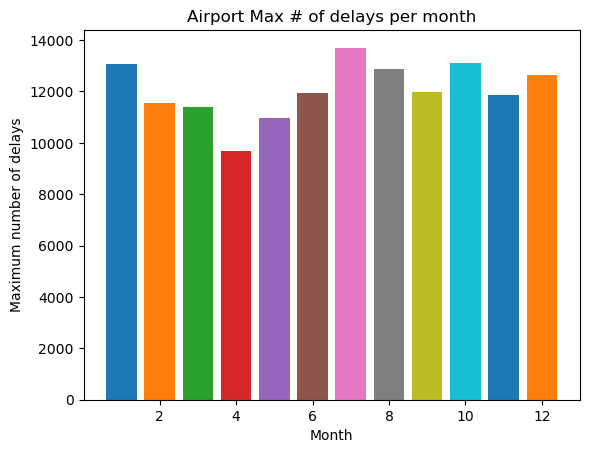

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from importlib import reload

PREDICTION_FILE = 'area_predictions.csv'

FILEPATH = "https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv"

df = pd.read_csv(FILEPATH)

rows, columns = df.shape

new_column = (
    df["Statistics.# of Delays.National Aviation System"]
    .add(df["Statistics.# of Delays.Carrier"])
    .add(df["Statistics.# of Delays.Late Aircraft"])
    .add(df["Statistics.# of Delays.Security"])
    .add(df["Statistics.# of Delays.Weather"])
)

maxes = []

df.insert(columns, "SumDelays", new_column, True)

df["Time.Label"] = pd.to_datetime(df["Time.Label"])

for i in range(1, 13):
    filtered_months = df[['Airport.Code', 'Airport.Name', 'Time.Label', 'SumDelays']][df['Time.Label'].dt.month == i]
    max_delays = filtered_months['SumDelays'].max()
    plt.bar(i, max_delays)
    maxes.append(max_delays)

vertical_ticks = np.linspace(0, np.average(maxes), 25).tolist().extend([max(maxes)])

plt.ylabel("Maximum number of delays")
plt.xlabel("Month")
plt.yticks(vertical_ticks)
plt.title("Airport Max # of delays per month")

plt.show()

In [3]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


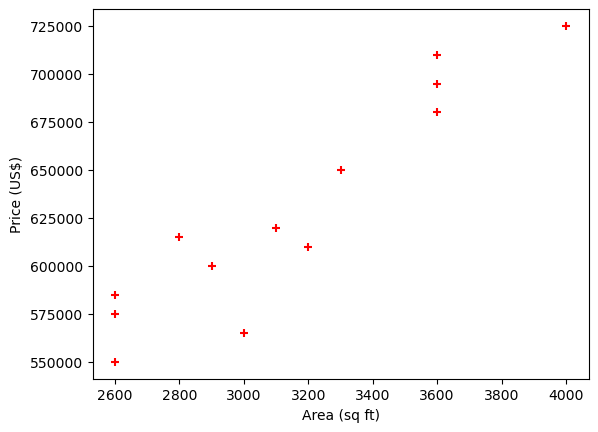

In [4]:
from importlib import reload

plt = reload(plt)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (US$)")
plt.scatter(df.area, df.price, color='red', marker='+')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']].values, df[['price']].values)


LinearRegression()

In [6]:
reg.predict([[5000]])


array([[848531.42501556]])

In [7]:
reg.coef_

array([[118.29495955]])

In [8]:
reg.intercept_

array([257056.62725576])

In [9]:
y = reg.coef_*5000+reg.intercept_
y

array([[848531.42501556]])

In [10]:
df = pd.DataFrame({ 'area': [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]})
df.to_csv('areas.csv', index=False)

In [11]:
d = pd.read_csv(PREDICTION_FILE)
d.head(3)

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [12]:
p = reg.predict(d[['area']].values)

In [13]:
d['prices'] = p
d
d.to_csv(PREDICTION_FILE, index=False)

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


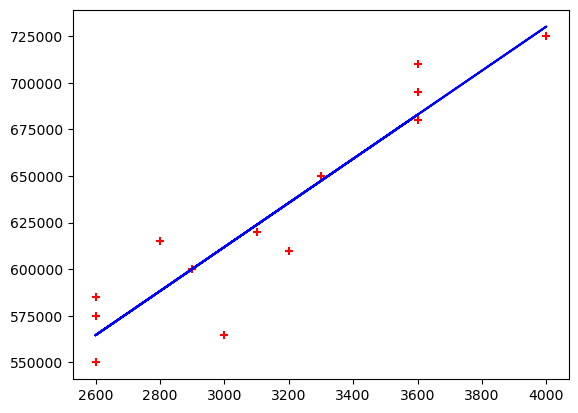

In [14]:
%matplotlib inline

d = pd.read_csv('homeprices.csv')

plt.scatter(d[['area']], d[['price']], color='red', marker='+')
plt.plot(d[['area']], reg.predict(d[['area']]), color="blue")

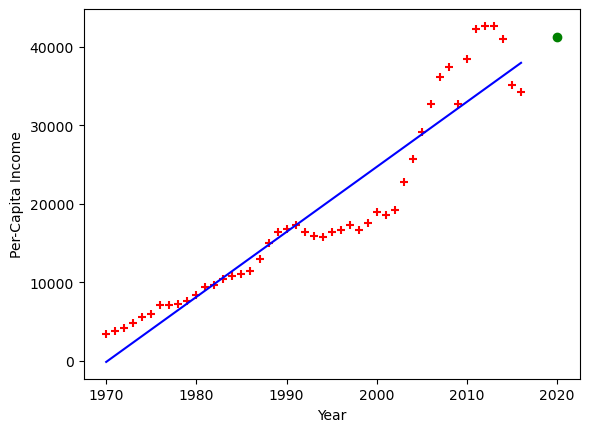

In [15]:
## Calculating canada's per capita income
## find out the predicted income in year 2020

income = pd.read_csv('canada_per_capita_income.csv')

income_model = linear_model.LinearRegression()


income = income.rename(columns={'per capita income (US$)': 'per_capita_income'})


income_model.fit(income[['year']].values, income[['per_capita_income']].values)

%matplotlib inline

plt.xlabel("Year")
plt.ylabel("Per-Capita Income")
plt.scatter(income[['year']], income[['per_capita_income']], color='red', marker='+')
plt.plot(income[['year']], income_model.predict(income[['year']].values), color='blue')
plt.plot(2020, income_model.predict([[2020]])[0][0], marker='o', markeredgecolor='green', markerfacecolor='green')

Text(0.5, 1.0, '# of airport delays by year')

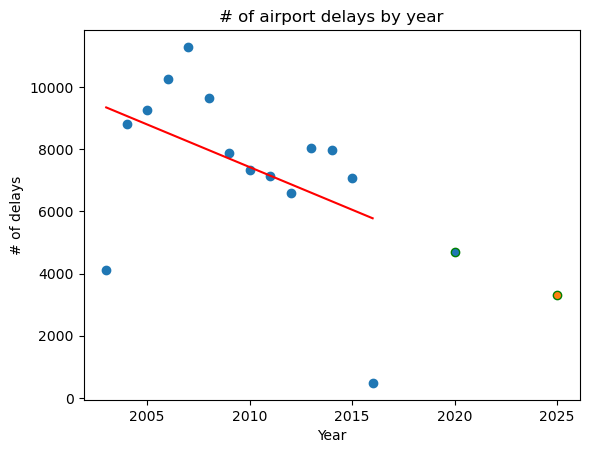

In [16]:
## predict the # of delays in the coming years for airlines

airport_df = pd.read_csv('./pandaspractice/airlines.csv')

# airport_df[['Time.Year']]

grouped_df = airport_df.groupby(by='Time.Year').sum()

#airport_df[['Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather']].aggregate(np.sum)

grouped_df['sum_delays'] = grouped_df['Statistics.# of Delays.Carrier'].add(grouped_df['Statistics.# of Delays.Late Aircraft']).add(grouped_df['Statistics.# of Delays.National Aviation System']).add(grouped_df['Statistics.# of Delays.Security']).add(grouped_df['Statistics.# of Delays.Weather'])

airport_model = linear_model.LinearRegression()

grouped_df = grouped_df.reset_index()


airport_model.fit(grouped_df[['Time.Year']].values, grouped_df[['sum_delays']].values)

%matplotlib inline

plt.scatter(grouped_df[['Time.Year']], grouped_df[['sum_delays']].apply(lambda x: x / 100))

plt.plot(grouped_df[['Time.Year']], [x / 100 for x in airport_model.predict(grouped_df[['Time.Year']].values)], color='red')

plt.plot(2020, airport_model.predict([[2020]])[0][0] / 100, marker='o', markeredgecolor='green')

plt.plot(2025, airport_model.predict([[2025]])[0][0] / 100, marker='o', markeredgecolor='green')

plt.ylabel('# of delays')
plt.xlabel('Year')
plt.title('# of airport delays by year')


In [17]:
airport_df = pd.read_csv('./pandaspractice/airlines.csv')

airport_multivariate_prediction = linear_model.LinearRegression()

grouped_by_month = airport_df.groupby(by='Time.Year').sum()

# airport_multivariate_prediction.fit(airport_df[['Statistics.Flights.Total', 'Time.Year', '']])

grouped_by_month['sum_delays'] = grouped_by_month['Statistics.# of Delays.Carrier'].add(grouped_by_month['Statistics.# of Delays.Late Aircraft']).add(grouped_by_month['Statistics.# of Delays.National Aviation System']).add(grouped_by_month['Statistics.# of Delays.Security']).add(grouped_by_month['Statistics.# of Delays.Weather']);

grouped_by_month = grouped_by_month.reset_index()

airport_multivariate_prediction.fit(grouped_by_month[['Time.Year', 'sum_delays']].values, grouped_by_month['Statistics.Flights.Total'].values)


LinearRegression()

The predicted salary of an developer who has 2 years of experience, 9 score on the test, and a 6 interview score
46346
The predicted salary of an developer who has 12 years experience, 10 test score, and a 10 interview score
96561


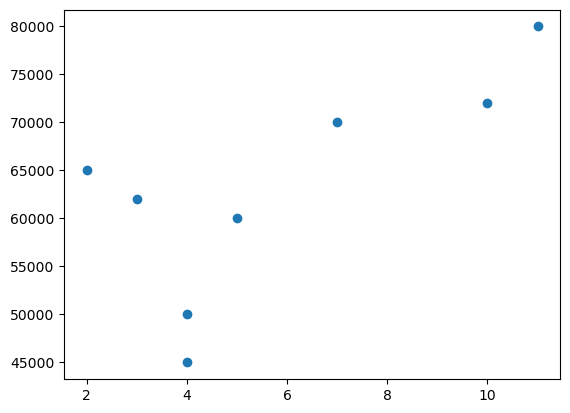

In [18]:
from math import floor
from word2number import w2n
import math

hiring_df = pd.read_csv('hiring.csv')

hiring_df['experience'] = hiring_df['experience'].fillna(value='zero')

hiring_df['test_score(out of 10)'] = hiring_df['test_score(out of 10)'].fillna(floor(hiring_df['test_score(out of 10)'].mean()))


hiring_df['experience'] = hiring_df['experience'].apply(lambda x: w2n.word_to_num(x))

hiring_df['experience'] = hiring_df['experience'].replace(0, floor(hiring_df['experience'].mean()))


hiring_model = linear_model.LinearRegression()

hiring_model.fit(hiring_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']].values, hiring_df['salary($)'].values)

hiring_model.predict([[12, 10, 10]])

%matplotlib inline

plt.scatter(hiring_df[['experience']], hiring_df[['salary($)']])

print('The predicted salary of an developer who has 2 years of experience, 9 score on the test, and a 6 interview score')

print(round(hiring_model.predict([[2, 9, 6]])[0]))

print('The predicted salary of an developer who has 12 years experience, 10 test score, and a 10 interview score')

print(round(hiring_model.predict([[12, 10, 10]])[0]))



Gradient descent is an algorithm that helps you find the best fit line for a given training set

Reading in the CSV of test scores

In [19]:
test_scores_df = pd.read_csv('test_scores.csv')
test_scores_df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


Creating a linear regression model to predict the cs score given a math score

Text(0.5, 1.0, 'Predicting Computer Science Scores given Math scores')

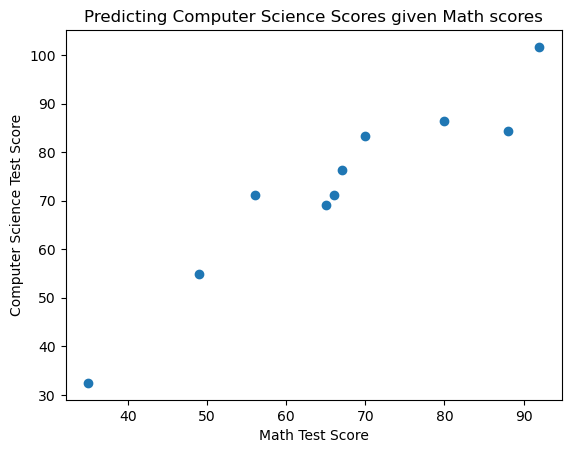

In [20]:
test_score_model = linear_model.LinearRegression()

test_score_model.fit(test_scores_df[['math']].values, test_scores_df[['cs']].values)

%matplotlib inline

plt.scatter(test_scores_df[['math']], test_score_model.predict(test_scores_df[['cs']].values))
plt.xlabel("Math Test Score")
plt.ylabel("Computer Science Test Score")
plt.title("Predicting Computer Science Scores given Math scores")


Printing out the model coefficient and intercept

In [21]:
test_score_model_coef = test_score_model.coef_[0][0]
test_score_model_coef

1.0177362378569326

In [22]:
test_score_model.intercept_[0]

1.9152193111569176

A gradient descent algorithm to compute a close enough value to the coefficient of the test_score_model

In [23]:
from math import isclose

def gradient_descent_test_scores(x, y, expected_coeff, expected_intercept) -> float:
    print(type(x))
    """
    Calculates the best fit line for the training set using the x and y coordinates

    mean squared error = 1/n * ( summation(i = 1 to n) of (y_i - (m * x_i + b))**2 )
    partial_derivative of m = 2/n * ( summation(i = 1 to n) of - x_i * (y_i - (m * x_i + b)) )
    partial_derivative of b = 2/n * ( summation(i = 1 to n) of - (y_i - (m * x_i + b)) )

    :param x: The x coordinates, nparray
    :param y: The y coordinates, np array
    :return: The best fit line for the training set
    """
    m_curr = 0.00  # the slope
    b_curr = 0.00  # the point
    score = 0.00
    max_iterations = 415533
    learning_rate = 0.0002
    iterations = 0
    n = len(x)
    while not isclose(m_curr, expected_coeff, rel_tol=1e-20) and not isclose(b_curr, expected_intercept,
                                                                             rel_tol=1e-20) and iterations < max_iterations:
        y_predicted = m_curr * x + b_curr  # predicts the next y
        score = (1 / n) * sum([z ** 2 for z in (y - y_predicted)])
        partial_derivative_m = -(2 / n) * sum(x * (y - y_predicted))
        partial_derivative_b = -(2 / n) * sum(y - y_predicted)
        m_curr = m_curr - (learning_rate * partial_derivative_m)
        b_curr = b_curr - (learning_rate * partial_derivative_b)
        iterations += 1
        print('[m_curr {} expected_m {}] [b_curr {} expected_b {}] | score {} | iteration {}\n'.format(m_curr,
                                                                                                       expected_coeff,
                                                                                                       b_curr,
                                                                                                       expected_intercept,
                                                                                                       score,
                                                                                                       iterations))

We are going to export the model in 2 ways, one through pickle and the other through joblib

In [24]:
import pickle

test_score_model_pickle = pd.read_csv('test_scores.csv')

example_model = linear_model.LinearRegression()

example_model.fit(test_score_model_pickle[['math']].values, test_score_model_pickle[['cs']].values)

with open('test_scores_pickle', 'wb') as pickle_file:
    pickle.dump(example_model, pickle_file)

print(example_model.predict([[99]]))

loaded_model = None

with open('test_scores_pickle', 'rb') as read_model:
    loaded_model = pickle.load(read_model)

loaded_model

print(loaded_model.predict([[99]]))

x = 'Loaded & Stored successfully with pickle!' if loaded_model.predict([[99]])[0][0] == example_model.predict([[99]])[0][0] else 'Failed to load/store'

x


[[102.67110686]]
[[102.67110686]]


'Loaded & Stored successfully with pickle!'

In [25]:
import joblib

test_score_model_joblib = pd.read_csv('test_scores.csv')

joblib_model = linear_model.LinearRegression()

joblib_model.fit(test_score_model_joblib[['math']].values, test_score_model_joblib[['cs']].values)

with open('test_scores_joblib', 'wb') as joblib_file:
    joblib.dump(joblib_model, joblib_file)

loaded_model = None

with open('test_scores_joblib', 'rb') as joblib_loaded_model:
    loaded_model = joblib.load(joblib_loaded_model)


x = 'Loaded & Stored successfully with joblib!' if joblib_model.predict([[99]]) == loaded_model.predict([[99]]) else 'Failed to load/store joblib'    

x

'Loaded & Stored successfully with joblib!'

In [40]:
home_prices_dummy_df = pd.read_csv('homeprices.csv')

home_dummies = pd.get_dummies(home_prices_dummy_df[['town']])

home_dummies

merged_home_prices = pd.concat([home_prices_dummy_df, home_dummies], axis='columns')

merged_home_prices = merged_home_prices.drop(columns=['town', 'town_west windsor'])

merged_home_prices

merged_home_prices_model = linear_model.LinearRegression()

x = merged_home_prices.drop(columns=['price']).values

y = merged_home_prices[['price']].values

merged_home_prices_model.fit(x, y)

merged_home_prices_model.predict([[2800, 0, 1]])

merged_home_prices_model.predict([[3400, 0, 0]])

merged_home_prices_model.score(x, y)

merged_home_prices

,area,price,town_monroe township,town_robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [48]:
dfle = home_prices_dummy_df

dfle['town'] = le.fit_transform(dfle[['town']])

dfle

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [82]:
dfle_x = dfle[['town', 'area']].values

dfle_x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [63]:
dfle_y = dfle[['price']].values

dfle_y

array([[550000],
       [565000],
       [610000],
       [680000],
       [725000],
       [585000],
       [615000],
       [650000],
       [710000],
       [575000],
       [600000],
       [620000],
       [695000]], dtype=int64)

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder='passthrough')


In [96]:
dfle_ohe_x = ohe.fit_transform(dfle_x)

dfle_ohe_x

dfle_ohe_x = dfle_ohe_x[:,1:]

dfle_ohe_x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [97]:
dfle_model = linear_model.LinearRegression()

dfle_model.fit(dfle_ohe_x, dfle_y)

LinearRegression()

In [99]:
dfle_model.predict([[1, 0, 2800]])

array([[590775.63964739]])

In [100]:
dfle_model.predict([[0, 1, 3400]])

array([[681241.6684584]])